# Acknowledgements

 dataset ini di download dari : https://finance.yahoo.com/quote/%5ERUT/history?p=%5ERUT

# DATA LOADER

  hal yang pertama kali kita lakukan disini adalah mengimport dataset kita. disini saya telah mengupload data set di  dalam folder github yang berjudul "flight_price_prediction"

In [178]:
!git clone https://github.com/RR21-crypto/flight_price_prediction.git


fatal: destination path 'flight_price_prediction' already exists and is not an empty directory.


setelah kita berhasil mengclone folder github yang berisi data set yang di ingingkan. Tahap selanjutnya adalah mengimport library yang kita butuhkan, disini ada beberapa library yang saya gunakan seperti yang terlihat di bawah.

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

tahap selanjutnya kita akan mendelarasikan variable untuk data set yang akan kita gunakan .Disini saya mendeklarasikan dengan nama variable "df".

In [180]:
df = pd.read_csv("/content/^RUT (1).csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/4/2018,1740.800049,1740.800049,1722.199951,1733.380005,1733.380005,3087420000
1,9/5/2018,1732.729980,1732.729980,1713.689941,1727.650024,1727.650024,3248780000
2,9/6/2018,1728.250000,1731.420044,1713.810059,1714.469971,1714.469971,3144240000
3,9/7/2018,1713.829956,1722.619995,1706.640015,1713.180054,1713.180054,2976580000
4,9/10/2018,1714.890015,1723.810059,1714.489990,1717.469971,1717.469971,2751100000
...,...,...,...,...,...,...,...
1253,8/28/2023,1859.329956,1877.449951,1859.329956,1869.010010,1869.010010,2957230000
1254,8/29/2023,1868.670044,1896.660034,1864.150024,1895.540039,1895.540039,3354820000
1255,8/30/2023,1893.469971,1908.890015,1889.280029,1903.209961,1903.209961,3064110000
1256,8/31/2023,1904.359985,1913.199951,1898.949951,1899.680054,1899.680054,3946360000


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1246 non-null   float64
 3   Low        1219 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1252 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [182]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1246.000000,1219.000000,1258.000000,1252.000000,1.258000e+03
mean,1789.980962,1805.368604,1772.876333,1789.794000,1790.091168,4.306366e+09
std,299.871055,302.916453,303.129292,300.185668,300.861763,1.069000e+09
min,988.710022,1017.890015,966.219971,991.159973,991.159973,0.000000e+00
25%,1554.547485,1563.372498,1541.464966,1553.147461,1552.834991,3.651082e+09
50%,1758.494995,1768.059998,1733.510010,1757.734985,1759.695007,4.070210e+09
75%,1996.507476,2025.679993,1987.619995,2000.857513,2001.504975,4.704702e+09
max,2442.219971,2458.860107,2438.060059,2442.739990,2442.739990,9.976520e+09


dari code diatas dapat kita lihat tipe data dari setiap kolom yang kita meiliki.disni kita memiliki 7 jenis kolom yang mewakili masing masiing variable :


*   date : tanggal data terekam
*   open : Harga pembukaan pada hari tersebut


*   High : harga tertinggi pada hari itu
*  LOw : Harga terendah pada hari tersebut

*   Close : Harga penutupan pada hari tersebut item
*   Adj Close : Harga penutupan pada hari tersebut setelah disesuaikan dengan aksi korporasi seperti right issue, stock split atau stock reverse

*   volume : berapa banyak transaksi yang terjadi pada hari tersebut




#MENANGANI MISSING VALUE

 Di dalam mengerjakan sebuah model, kita harus memastikan bahwa dataset yang kita miliki tak memiliki value NAN atau null. disini saya menggunakan command di bawah untuk mengecek apakah , data set memiliki nilai null.

In [183]:
df.isnull().sum()


Date          0
Open          0
High         12
Low          39
Close         0
Adj Close     6
Volume        0
dtype: int64

setelah di jalankan command yang diatas di ketahui bahwa dataset kita memiliki banyak nilai yang kosong. jika kita menangani masalah seperti ini kita memiliki dua pilihan yaitu kita hilangkan sel yang memiliki nilai kosong atau menisinya dengan nilai mean.

In [184]:
kolom_kosong=[kolom for kolom in df.columns if df[kolom].isnull ().any()]

print("kolom yang memiliki nilai kosong antara lain :",kolom_kosong)

kolom yang memiliki nilai kosong antara lain : ['High', 'Low', 'Adj Close']


In [185]:
from pandas.core.arrays.categorical import simplefilter
from sklearn.impute import SimpleImputer

pengisi = SimpleImputer()

df[kolom_kosong]=pengisi.fit_transform(df[kolom_kosong])

seperti yang telah sebutkan, disini saya memutuskan untuk mengisi nilai kosong dengan nilai mean dengan menggunkan "SimpleImputer". dan hasil dari comand diatas dapat kita lihat di bawah , dimana bahwa sel yang kosong telah hilang, untuk mengecek kembali atau memastikan ,anda bisa ikuti comand di bawah,

In [186]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1789.980962,1805.368604,1772.876333,1789.794000,1790.091168,4.306366e+09
std,299.871055,301.467084,298.389757,300.185668,300.142857,1.069000e+09
min,988.710022,1017.890015,966.219971,991.159973,991.159973,0.000000e+00
25%,1554.547485,1564.035004,1545.412506,1553.147461,1553.147461,3.651082e+09
50%,1758.494995,1772.550049,1745.854981,1757.734985,1761.090027,4.070210e+09
75%,1996.507476,2020.792511,1979.985016,2000.857513,2000.857513,4.704702e+09
max,2442.219971,2458.860107,2438.060059,2442.739990,2442.739990,9.976520e+09


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [188]:
df.shape

(1258, 7)

setelah masalah sel yang tak terisi , kita akan melanjutkan dengan meastikan nilai kita tak memiliki outliers.outliers adalah sampel yang nilainya sangat jauh dari cakupan umum data utama. Ia adalah hasil pengamatan yang kemunculannya sangat jarang dan berbeda dari data hasil

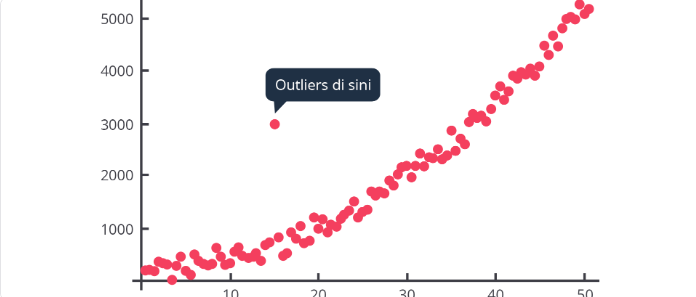

<Axes: xlabel='Open'>

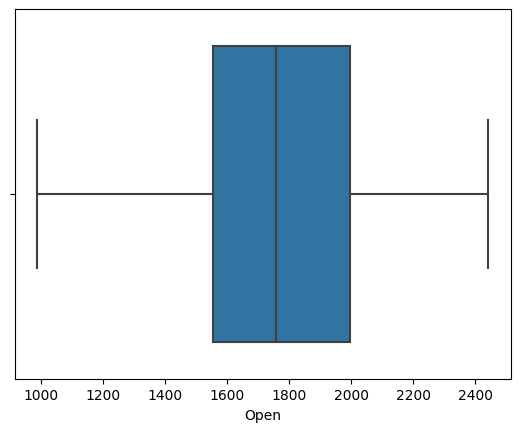

In [189]:
# Contoh data yang tak memiliki Outliers
sns.boxplot(x=df['Open'])

<Axes: xlabel='High'>

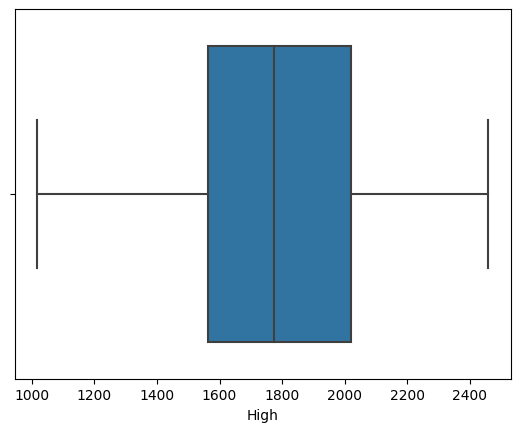

In [190]:
sns.boxplot(x=df['High'])

<Axes: xlabel='Low'>

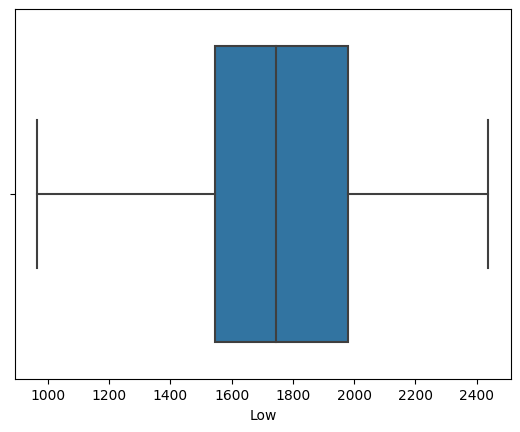

In [191]:

sns.boxplot(x=df['Low'])

<Axes: xlabel='Close'>

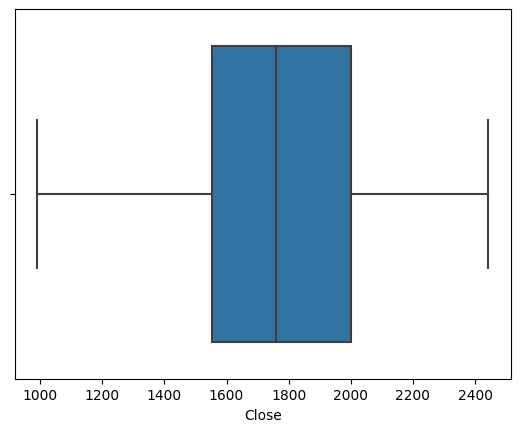

In [192]:
sns.boxplot(x=df['Close'])

setelah mengecek variable numerical atau bertipe Int64 , selanjutnya cara kita untuk menghilangkan outliers itu dengan cara menggunakan IQR .IQR untuk mengidentifikasi outlier yang berada di luar Q1 dan Q3. Nilai apa pun yang berada di luar batas ini dianggap sebagai outlier.

In [193]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
df.shape

<ipython-input-193-b475f557bd62>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-193-b475f557bd62>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-193-b475f557bd62>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


(1174, 7)

# Univariate Analysis

pada tahp ini kita menganalisa variable yang non numerical

In [194]:
numerical_features = ['Open'	,'High'	,'Low'	,'Close'	]
categorical_features = ['Date']

            jumlah sampel  persentase
9/4/2018                1         0.1
12/28/2021              1         0.1
1/20/2022               1         0.1
1/19/2022               1         0.1
1/18/2022               1         0.1
...                   ...         ...
5/8/2020                1         0.1
5/7/2020                1         0.1
5/6/2020                1         0.1
5/5/2020                1         0.1
9/1/2023                1         0.1

[1174 rows x 2 columns]


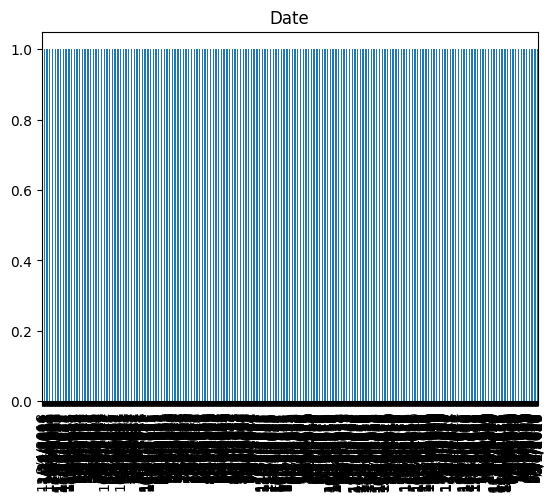

In [195]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_1)
count.plot(kind='bar', title=feature);

dari yang kita lihat bahwa setiap batang mewakili setiap tanggal sehingga bentuk dari graph kita seperti di atas.Selanjutnya setelah kita membahas variable atau feature non numerical, kita  akan membahas feature numerical yaang bisa kita lihat di bawah. saya menampilkan dua cara menampilkan numerical feature kembali pada refrensi anda yang mana anda lebih nyaman.Hal yang menjadi object kita untuk di prediksi adalah Adj Close, oleh karna hal itu anda bisa Fokus saja lihat diagram Adj Close


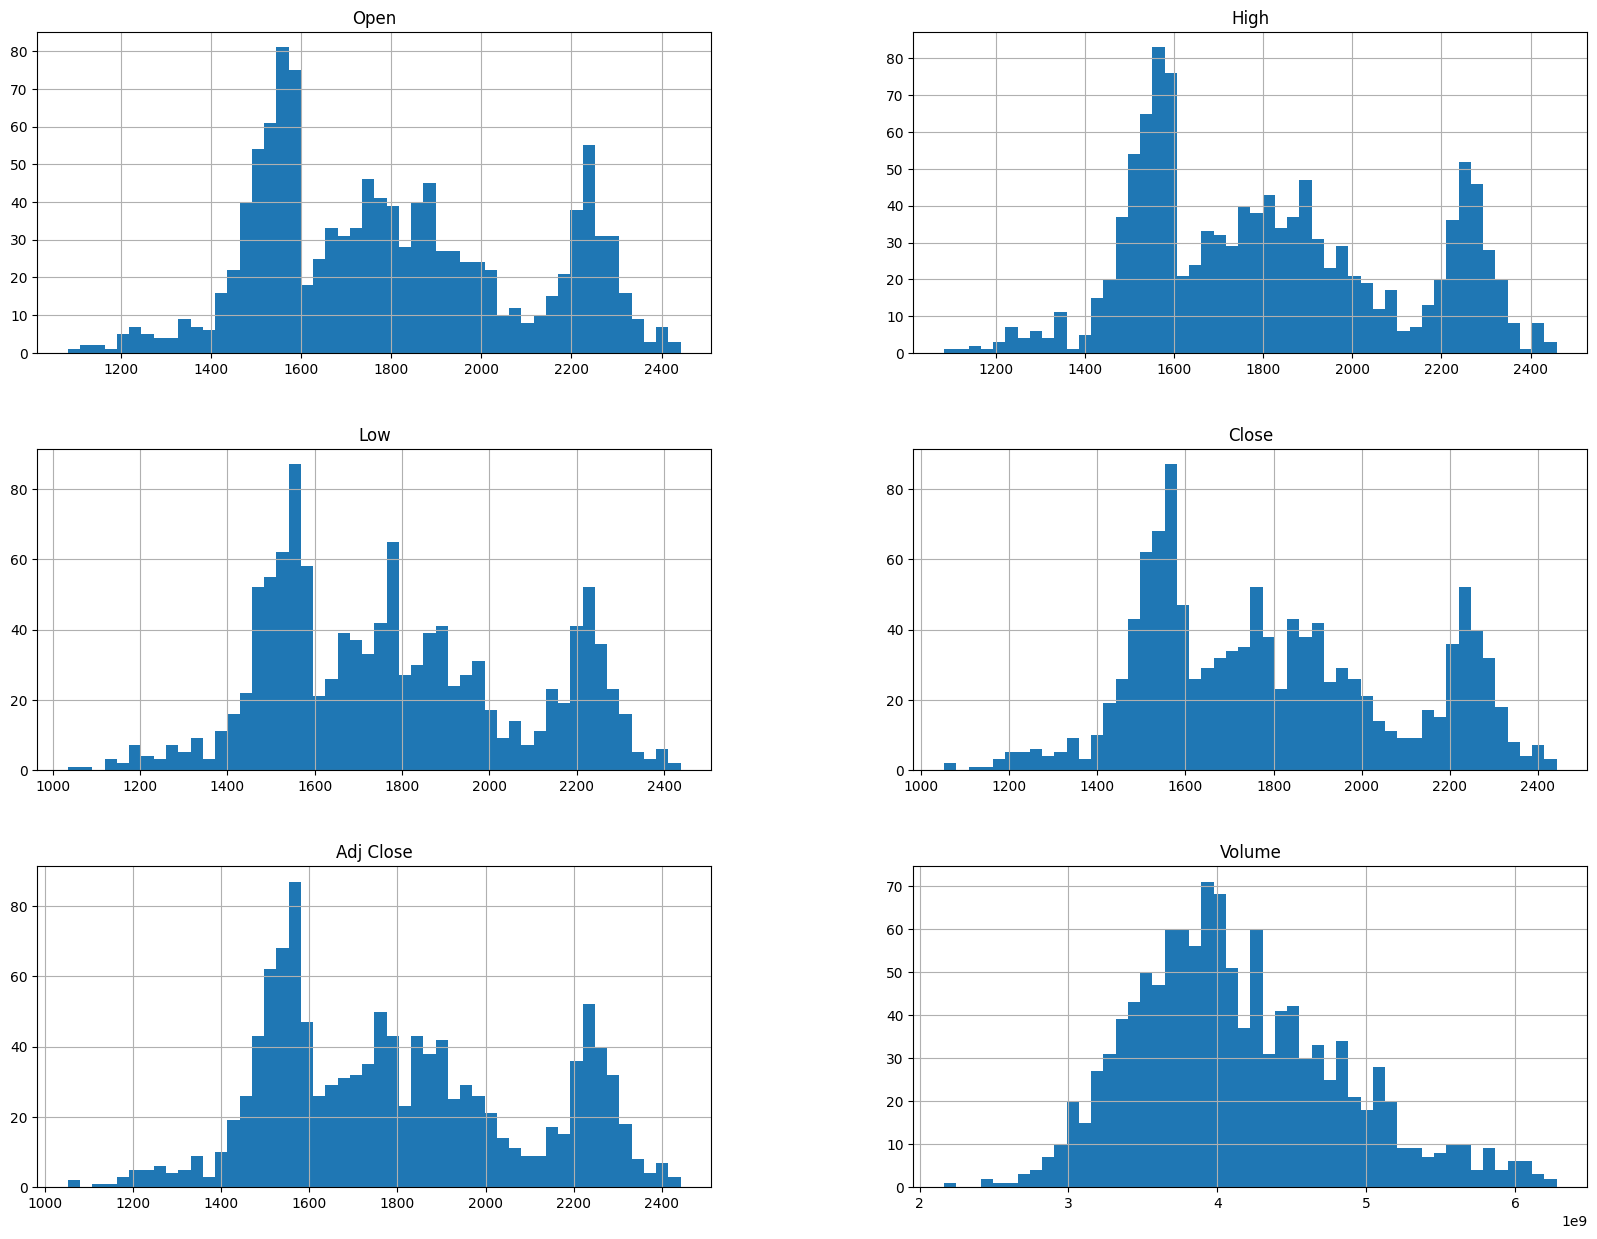

In [196]:
df.hist(bins=50, figsize=(20,15))
plt.show()

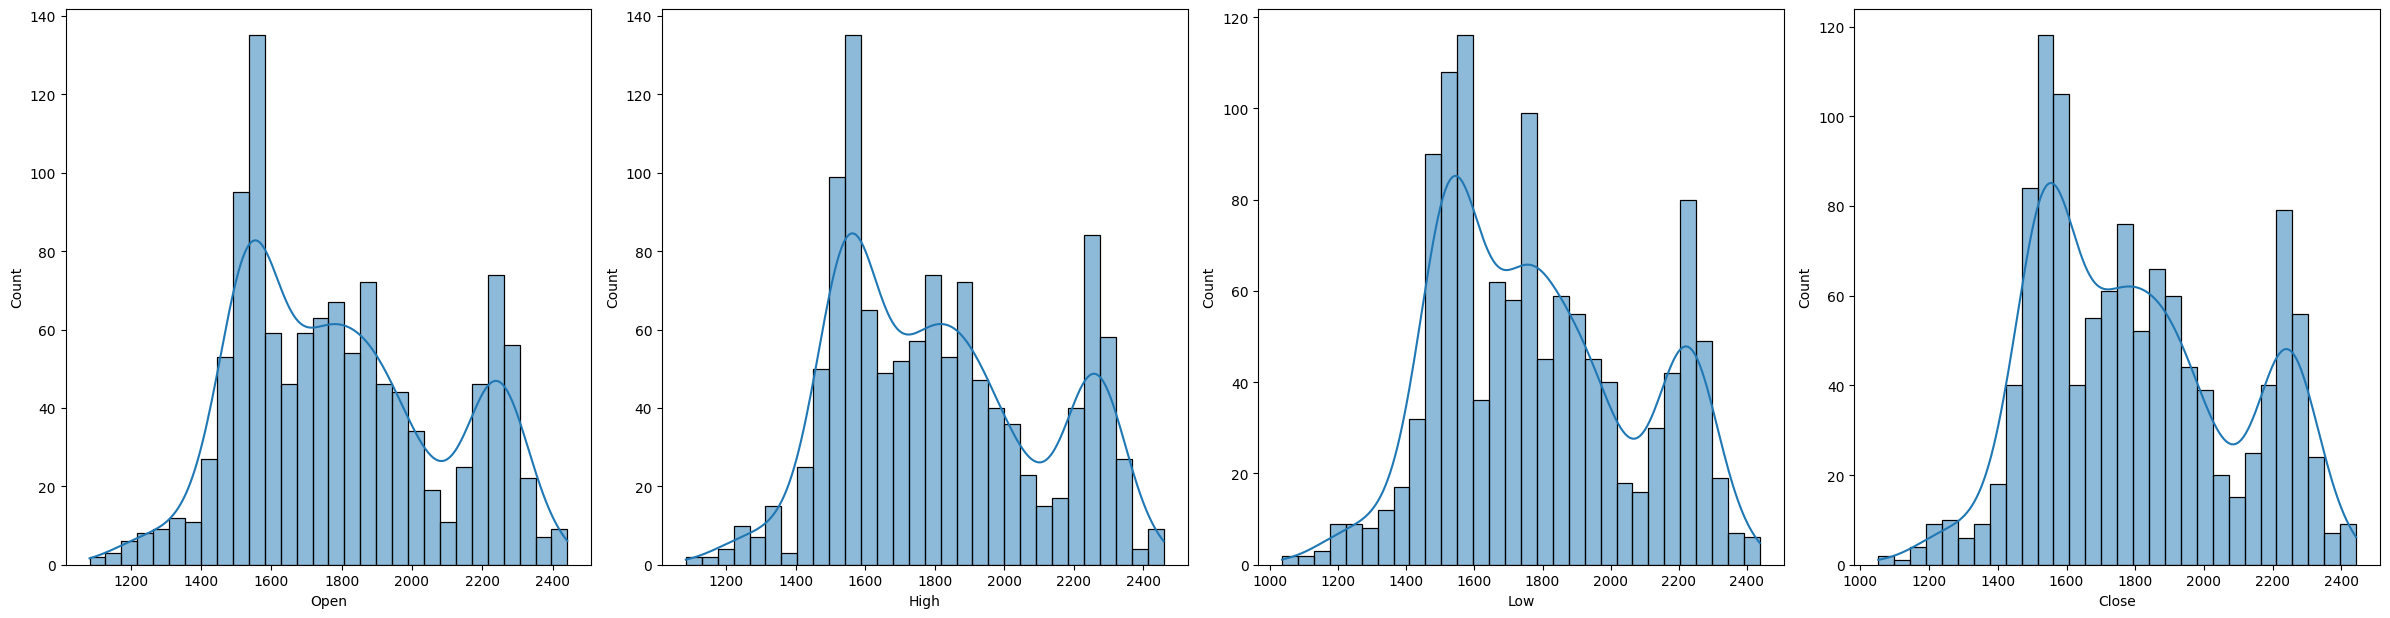

In [197]:
kolom= 4
baris = 2
fig = plt.figure(figsize=(kolom * 6, baris * 6))

for i ,col in enumerate (numerical_features):
  ax = fig.add_subplot(baris,kolom,i+1)
  sns.histplot(x=df[col], bins=30, kde=True, ax=ax)
fig.tight_layout()
plt.show()

# Exploratory Data Analysis - Multivariate Analysis
Numerical Features

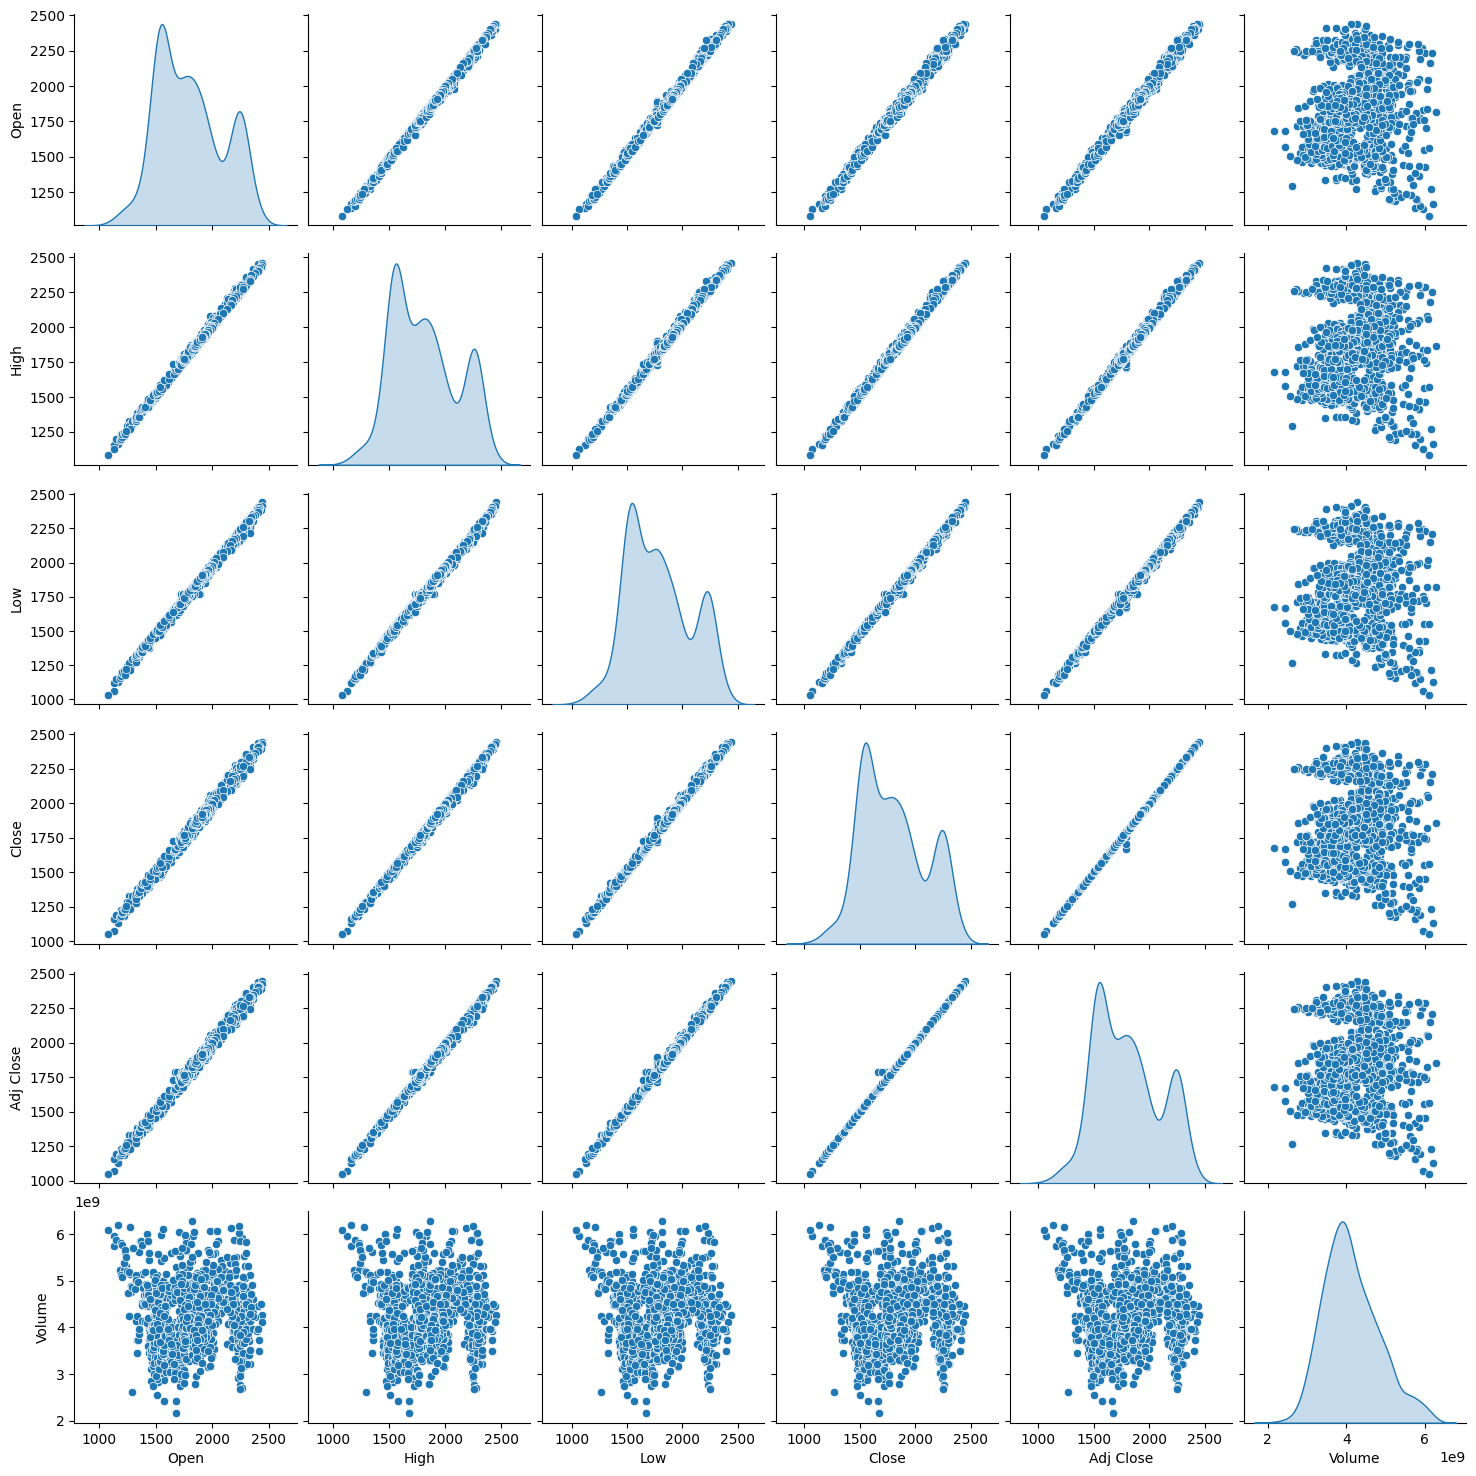

In [198]:
sns.pairplot(df, diag_kind = 'kde')

dari pairplot diatas kita hanya perlu fokus pada sumbu Y Adj Close, disini dapat terlihat bahwa dataset memiliki keterhubungan antar feature yang sangat tinggi , untuk gambaran lebih jelas kita bisa lihat gambar di bawah . untuk nilai yang mendekati 1 atau -1 itu mengindikasikan bahwa data memiliki keterkaitan yang sangat erat . namun semakin dekat dengan 0 maka data tersebut mengidikasikan sebaliknya.


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

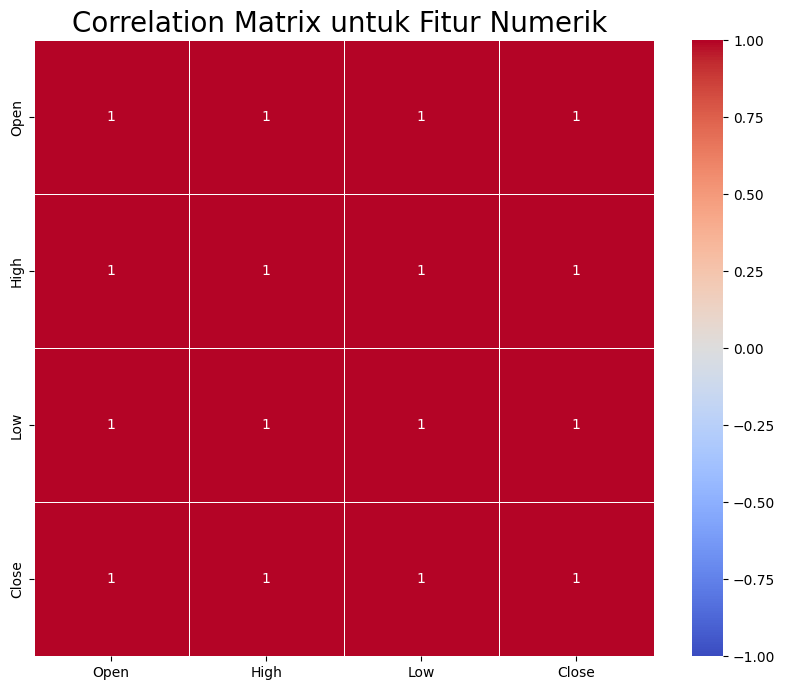

In [199]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# Data Preparation
untuk bagian ini kita mulai menseleksi data yang sekiranya tidak berpengaruh jika kita buang , guna membuat model lebih sederhana dan mempercepat pelatihan.

In [200]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/4/2018,1740.800049,1740.800049,1722.199951,1733.380005,1733.380005,3087420000
1,9/5/2018,1732.729980,1732.729980,1713.689941,1727.650024,1727.650024,3248780000
2,9/6/2018,1728.250000,1731.420044,1713.810059,1714.469971,1714.469971,3144240000
3,9/7/2018,1713.829956,1722.619995,1706.640015,1713.180054,1713.180054,2976580000
4,9/10/2018,1714.890015,1723.810059,1714.489990,1717.469971,1717.469971,2751100000


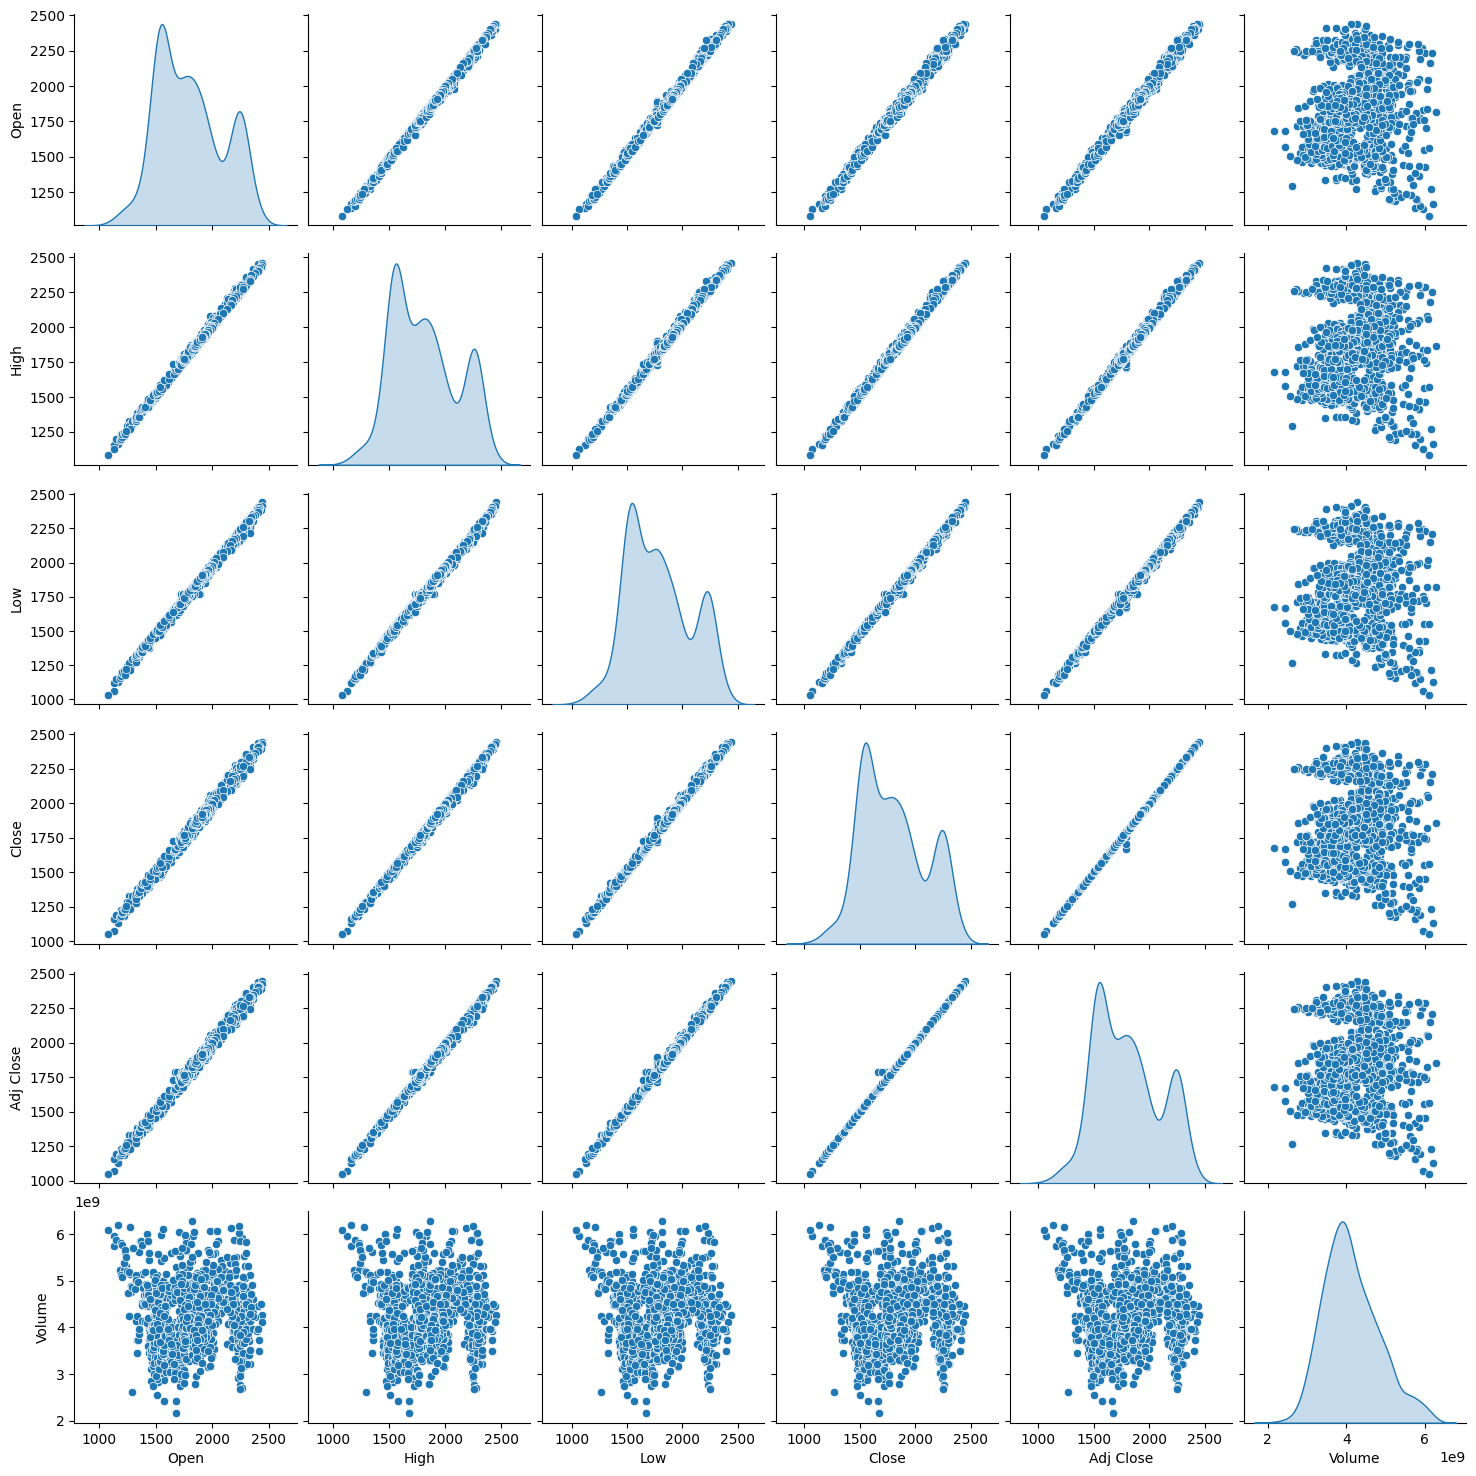

In [201]:
sns.pairplot(df, diag_kind = 'kde')

In [202]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(df[['Open','Low']])
princ_comp = pca.transform(df[['Open','Low']])

In [203]:
pca.explained_variance_ratio_.round(2)

array([1., 0.])

In [204]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/4/2018,1740.800049,1740.800049,1722.199951,1733.380005,1733.380005,3087420000
1,9/5/2018,1732.729980,1732.729980,1713.689941,1727.650024,1727.650024,3248780000
2,9/6/2018,1728.250000,1731.420044,1713.810059,1714.469971,1714.469971,3144240000
3,9/7/2018,1713.829956,1722.619995,1706.640015,1713.180054,1713.180054,2976580000
4,9/10/2018,1714.890015,1723.810059,1714.489990,1717.469971,1717.469971,2751100000


In [205]:
#saya menghapus feature ini dikarnakan tidak memiliki effect significabt terhadap Adj close
df.drop(['Volume','Date'], axis=1, inplace=True)

<ipython-input-205-699be29a0970>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Volume','Date'], axis=1, inplace=True)


In [206]:
df.head()

,Open,High,Low,Close,Adj Close
0,1740.800049,1740.800049,1722.199951,1733.380005,1733.380005
1,1732.729980,1732.729980,1713.689941,1727.650024,1727.650024
2,1728.250000,1731.420044,1713.810059,1714.469971,1714.469971
3,1713.829956,1722.619995,1706.640015,1713.180054,1713.180054
4,1714.890015,1723.810059,1714.489990,1717.469971,1717.469971


In [207]:
df.drop(['Low'], axis=1, inplace=True)

<ipython-input-207-fb84f6dc6a63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Low'], axis=1, inplace=True)


In [208]:
df.head()

,Open,High,Close,Adj Close
0,1740.800049,1740.800049,1733.380005,1733.380005
1,1732.729980,1732.729980,1727.650024,1727.650024
2,1728.250000,1731.420044,1714.469971,1714.469971
3,1713.829956,1722.619995,1713.180054,1713.180054
4,1714.890015,1723.810059,1717.469971,1717.469971


In [221]:
#membagi data train dan data test

from sklearn.model_selection import train_test_split

X = df.drop(["Adj Close"],axis =1)
y = df["Adj Close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [210]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1174
Total # of sample in train dataset: 1056
Total # of sample in test dataset: 118


Standarisasi

setelah membagi data set menjadi train dan test , sekarang kita akan melakukan standarisasi, hal ini sebaiknya di lakukan setelah melakukan pembagian data train dan data test.

In [211]:
from sklearn.preprocessing import StandardScaler
numerical_features=['Open','High','Close']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Open,High,Close
620,1.598639,1.571313,1.547327
556,-0.069539,-0.076175,-0.038874
163,-0.707191,-0.746910,-0.732207
318,-0.593441,-0.622948,-0.599517
703,1.504480,1.617365,1.668307


In [212]:
X_train[numerical_features].describe().round(4)

,Open,High,Close
count,1056.0000,1056.0000,1056.0000
mean,-0.0000,-0.0000,0.0000
std,1.0005,1.0005,1.0005
min,-2.4889,-2.5211,-2.5948
25%,-0.8337,-0.8424,-0.8350
50%,-0.1267,-0.1126,-0.1170
75%,0.6937,0.7080,0.6852
max,2.2080,2.1972,2.2095


# Model Development dengan K-Nearest Neighbor

In [213]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [214]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

# Model Development dengan Random Forest

In [215]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

# Model Development dengan Boosting Algorithm

In [216]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluasi Model

In [217]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [218]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse.round(4)

,train,test
KNN,0.078644,0.044701
RF,0.007337,0.01081
Boosting,1.189909,1.086555


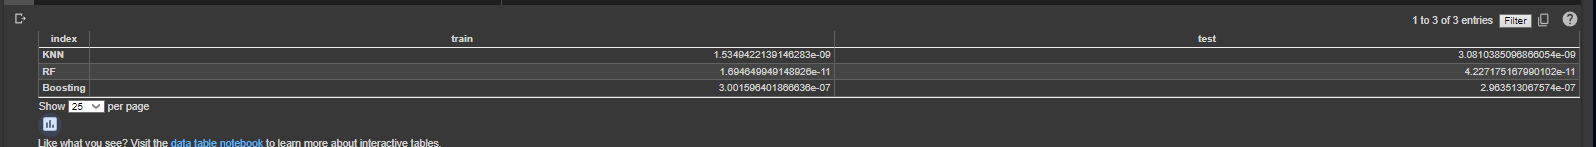

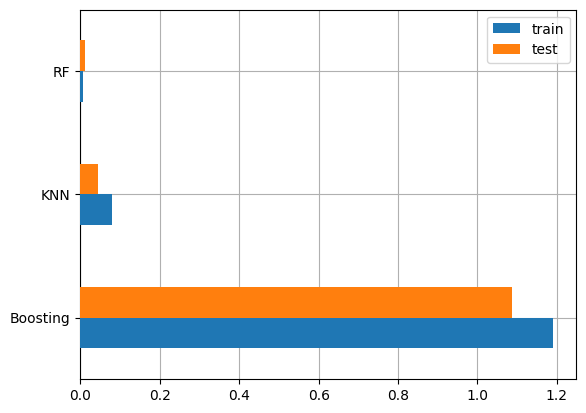

In [219]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [220]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
1226,1967.160034,1965.0,1968.4,1997.2


berdasarkan algoritma yang telah kita gunakan , terlihat bahwa algoritma rainforest memiliki tingkat prediksi paling mendekati dengan nilai yang kita prediksi